In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('file:///F:/advertising.csv')
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.describe().T

count         mean           std       min  \
Daily Time Spent on Site  1000.0     65.00020     15.853615     32.60   
Age                       1000.0     36.00900      8.785562     19.00   
Area Income               1000.0  55000.00008  13414.634022  13996.50   
Daily Internet Usage      1000.0    180.00010     43.902339    104.78   
Male                      1000.0      0.48100      0.499889      0.00   
Clicked on Ad             1000.0      0.50000      0.500250      0.00   

                                 25%        50%         75%       max  
Daily Time Spent on Site     51.3600     68.215     78.5475     91.43  
Age                          29.0000     35.000     42.0000     61.00  
Area Income               47031.8025  57012.300  65470.6350  79484.80  
Daily Internet Usage        138.8300    183.130    218.7925    269.96  
Male                          0.0000      0.000      1.0000      1.00  
Clicked on Ad                 0.0000      0.500      1.0000      1.00

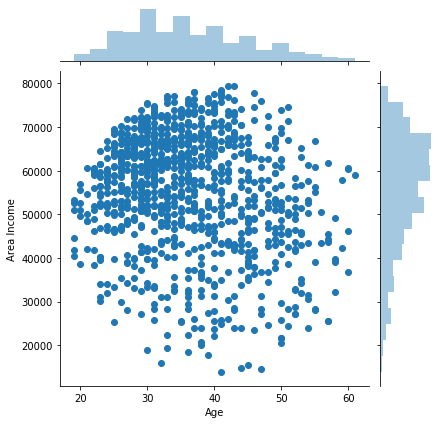

In [7]:
sns.jointplot(x='Age',y='Area Income',data=df)

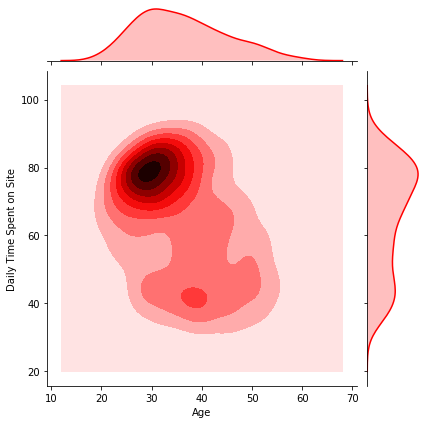

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red',kind='kde')

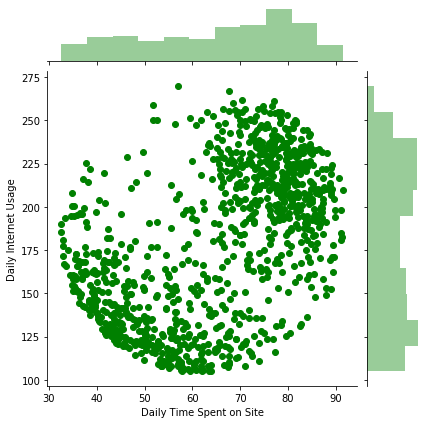

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green')

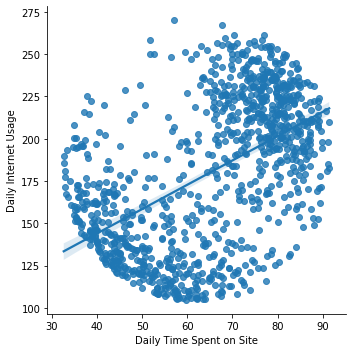

In [10]:
sns.lmplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df)

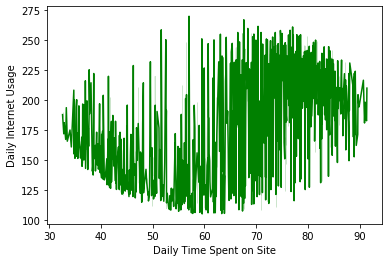

In [11]:
sns.lineplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green')

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


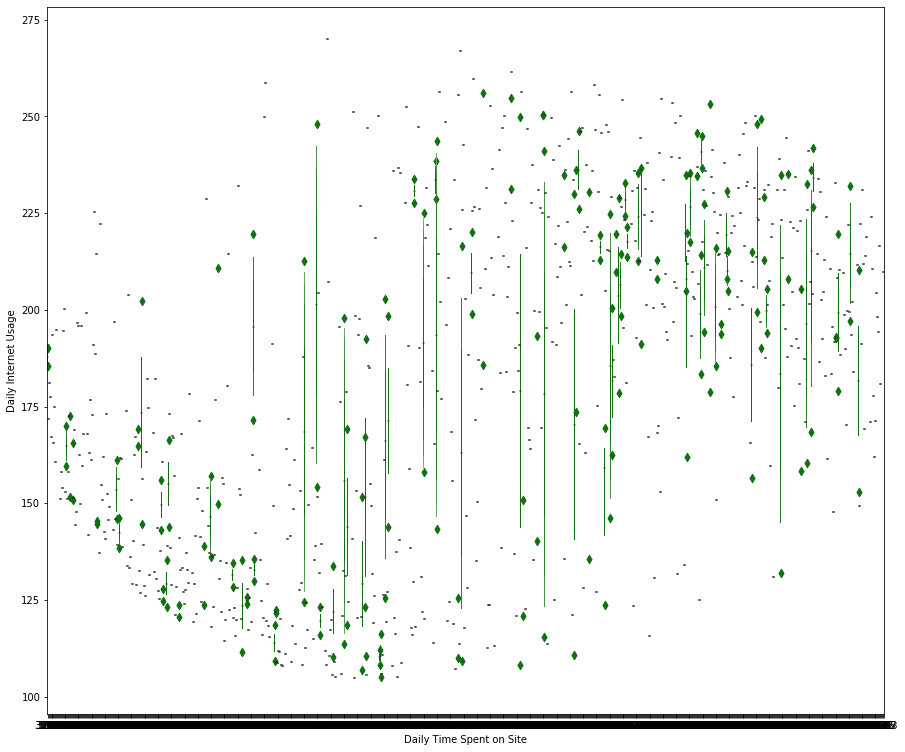

In [12]:
plt.figure(figsize=(15,13))
sns.lvplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green')

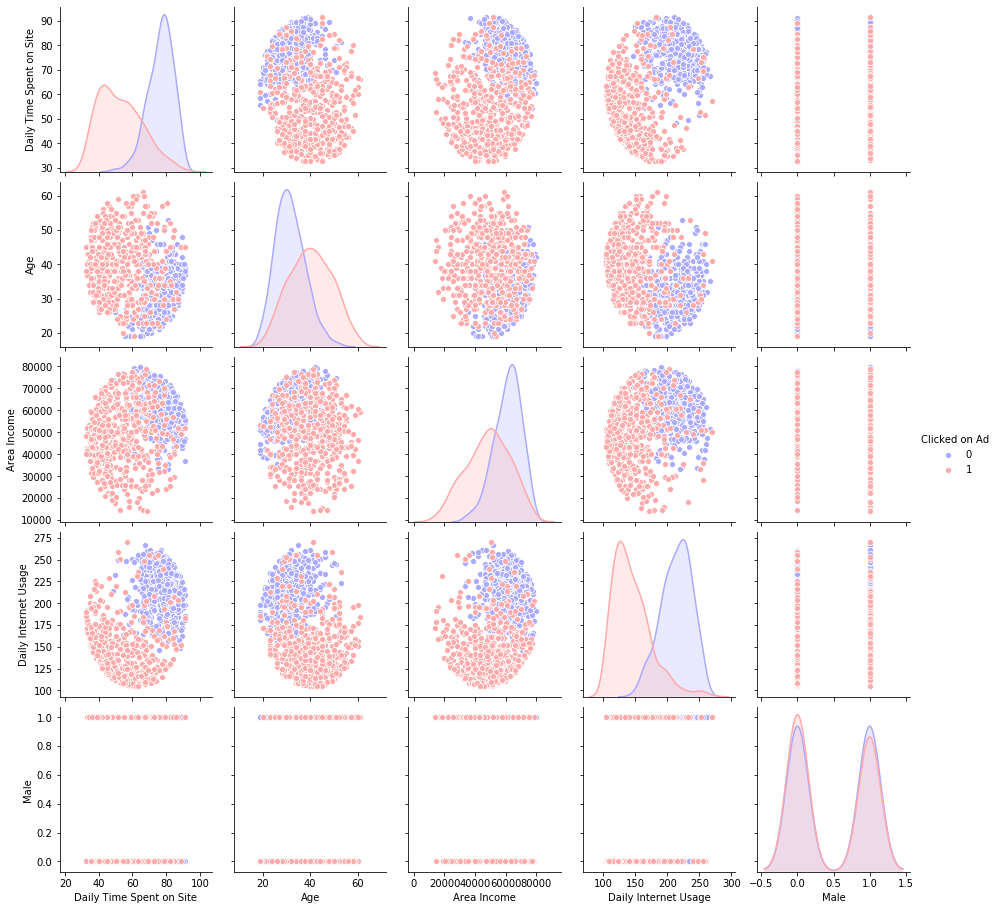

In [13]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

In [14]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [17]:
li=LogisticRegression()
li.fit(xtrain,ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
pre_li=li.predict(xtest)


In [19]:
print(classification_report(ytest,pre_li))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       158
           1       0.90      0.85      0.87       142

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [20]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
pre_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pre_tre)
accu_tre

0.9433333333333334

In [22]:
accu_tre=accuracy_score(ytest,pre_tre)
accu_tre

0.9433333333333334

In [23]:
print(classification_report(ytest,pre_tre))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       158
           1       0.94      0.94      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rdf=RandomForestClassifier()
rdf.fit(xtrain,ytrain)
pre_rdf=rdf.predict(xtest)
accu_rdf=accuracy_score(ytest,pre_rdf)
accu_rdf

0.9733333333333334

In [26]:
    print(classification_report(ytest,pre_rdf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       158
           1       0.98      0.96      0.97       142

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
pre_mnb=mnb.predict(xtest)
accu_mnb=accuracy_score(ytest,pre_mnb)
accu_mnb

0.8633333333333333

In [29]:
print(classification_report(ytest,pre_mnb))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87       158
           1       0.89      0.82      0.85       142

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
pre_gnb=gnb.predict(xtest)
accu_gnb=accuracy_score(ytest,pre_gnb)
accu_gnb

0.98

In [32]:
print(classification_report(ytest,pre_gnb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       158
           1       0.98      0.98      0.98       142

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [33]:
from sklearn.svm import SVC

In [34]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pre_svc)
accu_svc

0.7233333333333334

In [35]:
print(classification_report(ytest,pre_svc))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       158
           1       0.76      0.61      0.67       142

    accuracy                           0.72       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rnb=RandomForestClassifier()
rnb.fit(xtrain,ytrain)
pre_rnb=rnb.predict(xtest)
accu_rnb=accuracy_score(ytest,pre_rnb)
accu_rnb

0.98

In [38]:
print(classification_report(ytest,pre_rnb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       158
           1       0.99      0.97      0.98       142

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [39]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [40]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [41]:
le=LabelEncoder()
le_col=('Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City','Country',
       'Timestamp')

In [42]:
for i in le_col:
    df[i]=le.fit_transform(df[i])

In [43]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35          645                   955   
1                     80.23   31          853                   538   
2                     69.47   26          575                   871   
3                     74.15   29          437                   913   
4                     68.37   35          955                   784   

   Ad Topic Line  City  Male  Country  Timestamp  Clicked on Ad  
0             91   961     0      215        439              0  
1            464   903     1      147        474              0  
2            566   111     0      184        367              0  
3            903   939     1      103         56              0  
4            766   805     0       96        767              0

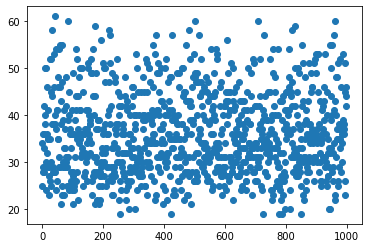

In [44]:
plt.scatter(df[['Timestamp']],df['Age'])

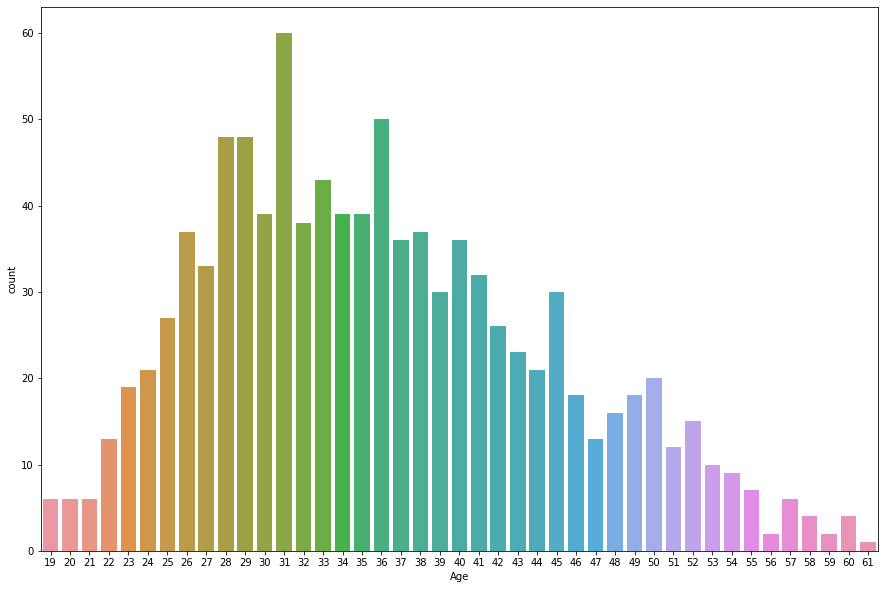

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'])

In [46]:
import sweetviz as sv

In [47]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [48]:
from IPython.display import IFrame

In [49]:
IFrame(src='Analyze.html',width=1000,height=600)

In [50]:
from dataprep.eda import *

  0%|          | 0/1452 [00:00<?, ?it/s]

DataPrep Report
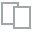
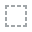
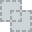
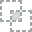
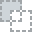
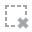
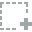
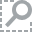
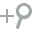
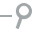
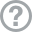
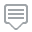
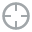
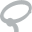
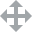
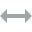
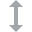
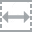
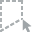
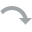
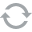
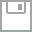
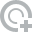
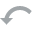
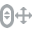
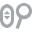
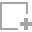
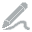
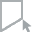
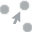
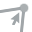
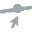

In [51]:
create_report(df)

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
men=MinMaxScaler()
feat=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad']
df[feat]=men.fit_transform(df[feat])
df[feat]

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                    0.617882  0.380952     0.645646              0.989637   
1                    0.809621  0.285714     0.853854              0.557513   
2                    0.626721  0.166667     0.575576              0.902591   
3                    0.706272  0.238095     0.437437              0.946114   
4                    0.608023  0.380952     0.955956              0.812435   
..                        ...       ...          ...                   ...   
995                  0.686215  0.261905     0.914915              0.674611   
996                  0.317865  0.619048     0.839840              0.214508   
997                  0.323474  0.761905     0.178178              0.097409   
998                  0.390107  0.000000     0.170170              0.524352   
999                  0.210947  0.166667     0.058058              0.478756   

     Ad Topic Line      City  Male   Country  Timestamp  Clicked on Ad  
0         0.091091  0.992769   0.0  0.911017   0.439439            0.0  
1         0.464464  0.932851   1.0  0.622881   0.474474            0.0  
2         0.566567  0.114669   0.0  0.779661   0.367367            0.0  
3         0.903904  0.970041   1.0  0.436441   0.056056            0.0  
4         0.766767  0.831612   0.0  0.406780   0.767768            0.0  
..             ...       ...   ...       ...        ...            ...  
995       0.345345  0.130165   1.0  0.491525   0.202202            1.0  
996       0.359359  0.504132   1.0  0.110169   0.567568            1.0  
997       0.263263  0.824380   1.0  0.593220   0.150150            1.0  
998       0.641642  0.965909   0.0  0.360169   0.422422            0.0  
999       0.971972  0.768595   0.0  0.118644   0.772773            1.0  

[1000 rows x 10 columns]

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
std=StandardScaler()
feat=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad']
df[feat]=std.fit_transform(df[feat])
df[feat]

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                    0.249267 -0.114905     0.504027              1.692364   
1                    0.961132 -0.570425     1.224561              0.197884   
2                    0.282083 -1.139826     0.261540              1.391318   
3                    0.577432 -0.798185    -0.216506              1.541841   
4                    0.212664 -0.114905     1.577899              1.079520   
..                        ...       ...          ...                   ...   
995                  0.502963 -0.684305     1.435871              0.602863   
996                 -0.864601  1.023896     1.176063             -0.988382   
997                 -0.843775  1.707176    -1.113709             -1.393361   
998                 -0.596389 -1.936986    -1.141422              0.083200   
999                 -1.261555 -1.139826    -1.529402             -0.074491   

     Ad Topic Line      City      Male   Country  Timestamp  Clicked on Ad  
0        -1.415086  1.700304 -0.962695  1.424572  -0.209578           -1.0  
1        -0.122976  1.492546  1.038750  0.451875  -0.088335           -1.0  
2         0.230363 -1.344415 -0.962695  0.981136  -0.458994           -1.0  
3         1.397766  1.621499  1.038750 -0.177517  -1.536330           -1.0  
4         0.923184  1.141508 -0.962695 -0.277648   0.926648           -1.0  
..             ...       ...       ...       ...        ...            ...  
995      -0.535204 -1.290685  1.038750  0.008440  -1.030571            1.0  
996      -0.486707  0.006007  1.038750 -1.278953   0.233827            1.0  
997      -0.819260  1.116434  1.038750  0.351744  -1.210704            1.0  
998       0.490171  1.607171 -0.962695 -0.434996  -0.268468           -1.0  
999       1.633325  0.923005 -0.962695 -1.250344   0.943968            1.0  

[1000 rows x 10 columns]